#### Importing Packages

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Reading the dataset

In [165]:
df = pd.read_csv("Salary_Data.csv")

#### Data Exploration

In [166]:
# Describe the dataset
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


##### Inferences from the above command result. 
###### We can find the total count as 30 records and hence no missing values in any of the fields.
###### We can also find the average value of each column.
###### Average salary is 76003.00 and std deviation of salary is 27414.429 which means if we pick any employee from the given dataset it would be + (or) - 27414.429 units away from the mean
###### Similarly we can find th minimum and maximum values of salary and experience
###### Upon seeing the 25%, 50% and 75% values of all the fields  looks almost bell curve but may not be evenly distributed 


In [167]:
# Sample Data
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


#### Select important Features

In [197]:
df_feature = df[["YearsExperience","Salary"]]

In [198]:
df_feature.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


#### Identifying missing values

In [172]:
# Identify if any null values
df_feature.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [173]:
# Identify if any "?" values
df_feature.isin(["?"]).sum()

YearsExperience    0
Salary             0
dtype: int64

In [174]:
# Identify if any "? " values
df_feature.isin(["? "]).sum()

YearsExperience    0
Salary             0
dtype: int64

#### There are no missing values

#### We can do plotting of these features in histrogram

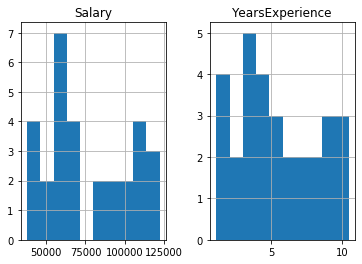

In [175]:
viz = df_feature[["Salary","YearsExperience"]]
viz.hist()
plt.show()

#### We can do plotting of the YearsExperience against the Salary to check the linear relation

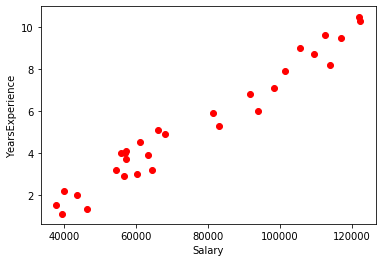

In [177]:
plt.scatter(df_feature.Salary, df_feature.YearsExperience,  color='red')
plt.xlabel("Salary")
plt.ylabel("YearsExperience")
plt.show()

#### The relationship between Salary and years of experience seems tobe linear.

#### Finding the correlation between salary and years of experience

In [199]:
df_feature[['YearsExperience','Salary']].corr()['Salary'][:]

YearsExperience    0.978242
Salary             1.000000
Name: Salary, dtype: float64

#### The above correlation value determines that years of experience has very significant relationship with target.  The value of correlation coefficient is closer to 1 i.e 0.978

#### Train and Test Split

In [201]:
# import the libraries
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [202]:
# Creating dataframe with independent variables only
X = df_feature[['YearsExperience']]

In [203]:
# Creating dataframe with dependent (or) response variable only
Y = df_feature[['Salary']]

In [204]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 42)

In [205]:
lreg = linear_model.LinearRegression()

In [206]:
lreg.fit (X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [207]:
# Finding the coefficients
print ('Coefficients: ', lreg.coef_)
print ('Intercept: ',lreg.intercept_)

Coefficients:  [[9423.81532303]]
Intercept:  [25321.58301178]


In [208]:
type(X_train)

pandas.core.frame.DataFrame

#### The coefficient of Salary is 9423.815
#### The intercept (or) constant in slope equation is 25321.583
#### i.e. Y^ = mX + C
#### i.e Y^ = 9423.8 * X + 25321.6 --> is the simple linear equation which is the best fit line with minimum MSE (Mean Squared Error)


## We can plot the best fit line derived against the actual train dataset points

Text(0, 0.5, 'Salary')

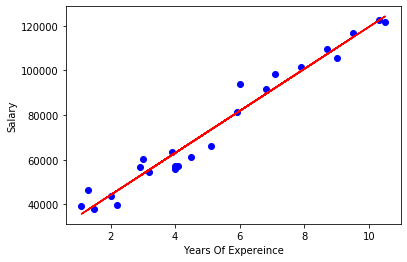

In [209]:
plt.scatter(X_train, Y_train,  color='blue')
plt.plot(X_train, lreg.coef_*X_train + lreg.intercept_, 'r-')
plt.xlabel("Years Of Expereince")
plt.ylabel("Salary")

#### Evaluation of the model

#### Predicting the target values for the test data - X_test

In [192]:
from sklearn.metrics import r2_score
import math
Y_predict = lreg.predict(X_test)

#### printing Y_test and Y_predict values

Text(0, 0.5, 'Salary')

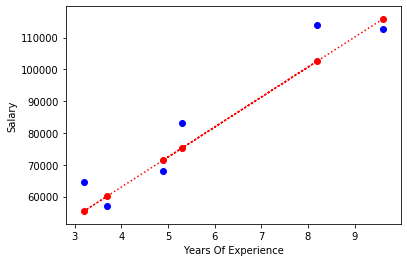

In [216]:
plt.scatter(X_test, Y_test,  color='blue')
plt.plot(X_test,Y_predict,linestyle='dotted',color='red')
plt.scatter(X_test, Y_predict,  color='red')
plt.xlabel("Years Of Experience")
plt.ylabel("Salary")

#### Regression metrics

In [217]:
MAE = round(np.mean(np.absolute(Y_test - Y_predict)))
MSE = round(np.mean((Y_test - Y_predict)**2))
print("Mean Absolute Error = {}".format(MAE))
print("Mean Square Error = {}".format(MSE))
print("R Square = ",r2_score(Y_predict,Y_test))

Mean Absolute Error = Salary    6286.0
dtype: float64
Mean Square Error = Salary    49830097.0
dtype: float64
R Square =  0.8961838737587328


#### The R2 value is 89% which means the regression model fits the given dataset. Also it ensures that Years of experience is the significant variable of the regression model